## 熱伝導(フーリエの法則)

$q = \lambda { \cfrac{\partial \theta}{\partial x} }$

* $q$ ... 伝導による伝熱量 [W/m<sup>2</sup>]
* $\lambda$ ... 熱伝達率 [W/m<sup>2</sup>K]
* $\partial \theta$ ... 温度差 [K]
* $\partial x$ ... 距離[m]


In [1]:
#matplotlib inline

import matplotlib.pyplot as plt
import math
import nbimporter
import Functions as F
import Modules as M

Importing Jupyter notebook from Functions.ipynb
Importing Jupyter notebook from Modules.ipynb


1cm厚のせっこうボードを10層重ねた壁体の内外温度を10度、40度とした場合の温度変化を計算してみます。

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


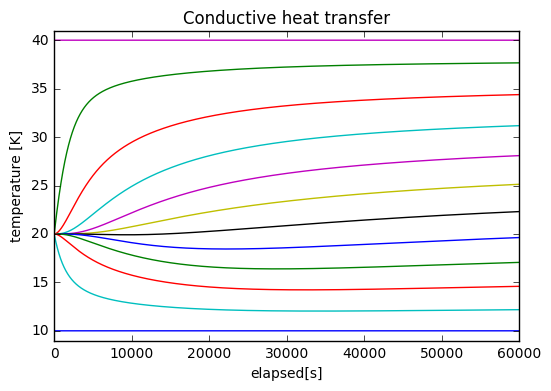

In [2]:
#計算単位時間 dt[s]
dt = 10

#厚み1cm、表面積1m2 せっこうボード 20[K] を10層
boards = []
for n in range(10):
    boards.append(M.HeatCapacityModule(1 * 0.01, 854, 20))

#10層間を伝熱による熱移動
fouriers = []
for n in range(9):
    f = M.ConductiveHeatTransferModule(dt=1, dx=0.01, rambda=0.22, S = 1, T1=boards[n].T, T2=boards[n+1].T)
    boards[n].HeatIn.append(f.HeatOut1)
    boards[n+1].HeatIn.append(f.HeatOut2)
    fouriers.append(f)

#室温 10[K], 外気温 40[K]
Tr = F.Function(lambda t: 10)
To = F.Function(lambda t: 40)

#室外側・室内側せっこうボードへの自然対流熱伝達 
boards[0].HeatIn.append( F.NewtonCooling(boards[0].T, To, 1, 1.98, dt) )
boards[9].HeatIn.append( F.NewtonCooling(boards[9].T, Tr, 1, 1.98, dt) )

container = M.ContainerModule()
container.Modules.extend(boards)
container.Modules.extend(fouriers)

data = []
for i in range(6000):
    container.commit(i)
    data.append((i*dt, boards[0].T(i), boards[1].T(i), boards[2].T(i),boards[3].T(i),boards[4].T(i),boards[5].T(i),boards[6].T(i),boards[7].T(i), boards[8].T(i), boards[9].T(i)))

#表示
x = [x[0] for x in data]
plt.title("Conductive heat transfer")
plt.plot(x, [Tr(0) for y in data], label="$Tr$")
plt.plot(x, [y[1] for y in data], label="$T_{b1}$")
plt.plot(x, [y[2] for y in data], label="$T_{b2}$")
plt.plot(x, [y[3] for y in data], label="$T_{b3}$")
plt.plot(x, [y[4] for y in data], label="$T_{b4}$")
plt.plot(x, [y[5] for y in data], label="$T_{b5}$")
plt.plot(x, [y[6] for y in data], label="$T_{b6}$")
plt.plot(x, [y[7] for y in data], label="$T_{b7}$")
plt.plot(x, [y[8] for y in data], label="$T_{b8}$")
plt.plot(x, [y[9] for y in data], label="$T_{b9}$")
plt.plot(x, [y[10] for y in data], label="$T_{b10}$")
plt.plot(x, [To(0) for y in data], label="$To$")
plt.ylim(9,41)
plt.xlabel("elapsed[s]")
plt.ylabel("temperature [K]")
#plt.legend(loc="upper left", ncol=5)

plt.show()